# Deep Learning Homework 1
### Author: Mark Sillye, OGKFFA
Note: Gitlab's notebook doesn't seem to display plots!
## Task 1 - Picture
The task was to load 5 32x32 pixel pictures, show them and write the content of the arrays / matrices to the standard output.
Afterwards I had to calculate the average and the deviation of the 5 pictures per-channel (RGB).
Finally I had to change these datasets to have a 0 expected value and a 1 deviation.

### Reading a picture and normalizing the RGB data
First we have to read a picture. I use the PIL python library for this purpose.
This function reads a picture named *filename*. It stores the x and y values from the picture size.
I creates an output matrix (x*y*3 size), and stores RGB data in the matrix.
It normalizes the data to be a number between 0-1 (originally 0-255).
Important thing to note is that numpy uses row-column order, while PIL uses column-row, hence the switched-up i-j variables.

In [2]:
def read_rgb_matrix_and_normalize(filename):
    from PIL import Image
    import numpy as np
    pic = Image.open(filename)
    (x, y) = pic.size
    pixels = pic.load()
    output = np.zeros((x, y, 3))
    for i in range(x):
        for j in range(y):
            output[j, i] = [x / 255 for x in pixels[i, j]][0:3]
    return output


### Separating RGB channels for a picture matrix
Next up I had to create the separate RGB channels from the matrix. I used the itertools to iterate through 2 variables in 1 line.

In [3]:
def get_rgb_channels(matrix):
    (x, y, z) = matrix.shape

    import itertools
    red = [matrix[i, j][0] for i, j in itertools.product(range(x), range(y))]
    green = [matrix[i, j][1] for i, j in itertools.product(range(x), range(y))]
    blue = [matrix[i, j][2] for i, j in itertools.product(range(x), range(y))]

    return red, green, blue

### Calculating average
I used numpy to calculate the average for the channels.

In [4]:
def calculate_average(red, green, blue):
    import numpy as np
    return np.average(red), np.average(green), np.average(blue)


### Calculating deviance
I used numpy to calculate the deviance as well

In [5]:
def calculate_deviance(red, green, blue):
    import numpy as np
    return np.std(red), np.std(green), np.std(blue)

### Creating a 0 expected value 1 deviation dataset
I used the StandardScaler from sklearn to transform the dataset.

In [6]:
def calculate_std(data):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    return scaler.fit_transform(data)

### Running the functions, printing the matrices, displaying in pyplot
Now all that's left is to run the functions in an organized manner.
The input pictures are named picture_(1-5).png.
I used matplotlib to display the pictures above each other.

In [7]:
def task_rgb():
    from matplotlib import pyplot as pypl
    print("Task: RGB")
    red = []
    blue = []
    green = []
    for i in range(5):
        output = read_rgb_matrix_and_normalize('picture_{}.png'.format(i + 1))
        print(output)
        r1, g1, b1 = get_rgb_channels(output)
        r1_dev, g1_dev, b1_dev = calculate_deviance(r1, g1, b1)
        r1_avg, g1_avg, b1_avg = calculate_average(r1, g1, b1)
        red.append((r1_dev, r1_avg))
        green.append((g1_dev, g1_avg))
        blue.append((b1_dev, b1_avg))
        print("RGB average for P{} is {} {} {}".format(i, r1_avg, g1_avg, b1_avg))
        print("RGB deviance for P{} is {} {} {}".format(i, r1_dev, g1_dev, b1_dev))
        pypl.subplot(231+i)
        pypl.imshow(output, extent=(0, 32, 0, 32))
    print("RED: {}".format(red))
    print("GREEN: {}".format(green))
    print("BLUE: {}".format(blue))
    std_red = calculate_std(red)
    std_blue = calculate_std(blue)
    std_green = calculate_std(green)
    print("RED STD: {}".format(std_red))
    print("GREEN STD: {}".format(std_green))
    print("BLUE STD: {}".format(std_blue))
    pypl.show()

Task: RGB
[[[0.63137255 0.68627451 0.36470588]
  [0.63921569 0.67843137 0.36470588]
  [0.65098039 0.65882353 0.35686275]
  ...
  [0.68235294 0.56862745 0.68235294]
  [0.6745098  0.54509804 0.71764706]
  [0.63137255 0.51372549 0.75294118]]

 [[0.62352941 0.64313725 0.31764706]
  [0.63921569 0.61176471 0.30196078]
  [0.65490196 0.60784314 0.31372549]
  ...
  [0.57647059 0.49411765 0.65098039]
  [0.55294118 0.45882353 0.69411765]
  [0.51764706 0.43137255 0.7372549 ]]

 [[0.61960784 0.59607843 0.27058824]
  [0.63529412 0.56862745 0.2745098 ]
  [0.65098039 0.54901961 0.27843137]
  ...
  [0.46666667 0.43529412 0.63921569]
  [0.45882353 0.4        0.68235294]
  [0.42745098 0.36470588 0.7254902 ]]

 ...

 [[0.64313725 0.61176471 0.55294118]
  [0.55686275 0.61176471 0.52156863]
  [0.4745098  0.61960784 0.48235294]
  ...
  [0.61960784 0.70196078 0.83921569]
  [0.68235294 0.74509804 0.87843137]
  [0.75294118 0.79607843 0.91764706]]

 [[0.70196078 0.60784314 0.60784314]
  [0.62352941 0.60392157 0.

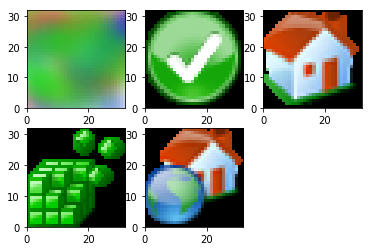

In [13]:
task_rgb()

## Task 2 - Audio
The task was to load a custom sound file and display a specgram using the audio data.

### The script to read and transform data
To read a soundfile I used the soundfile library to open the wav file.
The open function returned the data and the sample rate.
I had to flatten the data to a list of numbers in order to display with specgram, because it was a list of tuples.
I displayed the spectogram using matplotlib's specgram function and using the samplerate from the audio.

In [9]:
def task_sound():
    import soundfile as sf
    from matplotlib import pyplot as pypl
    print("Task: SOUND")
    data, samplerate = sf.read("file_long.wav")
    flat_data = [item for sublist in data for item in sublist]
    print("Length of the sound file: {}".format(len(flat_data)))
    pypl.specgram(flat_data, Fs=samplerate)
    pypl.show()

Task: SOUND
Length of the sound file: 4790274


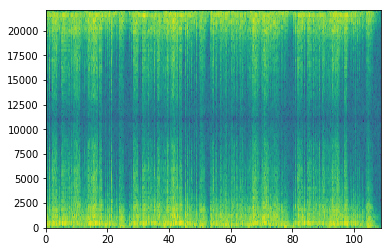

In [10]:
task_sound()

## Task 3 - Text from a website
The task was to load the textual data from http://www.snopes.com/facebook-ai-developed-own-language/ and to print the raw text to the console. 
Afterwards the task was to display the number of times each letter occured in the text.

### The script to read the data from the web and then clean it for counting
I used beautifulsoup to read data from the website, used the default html parser in python to parse it.
Then, I removed every script and style tag, because they were obscuring the text data.
I also had to remove escaped '\n' and '\t' characters, because there were a lot of them and they are not actual characters, but since they were escaped, the regex accepts them as characters.
I ran a simple regex on the text that cleaned the text from any non-ascii letters.
I changed all of the letter to lowercase.
Afterwards I simply displayed the histogram using the text as a list of characters.

In [11]:
def task_website():
    import bs4
    import urllib.request
    from matplotlib import pyplot as pypl
    print("Task: WEBSITE")
    link = "http://www.snopes.com/facebook-ai-developed-own-language/"

    webpage = str(urllib.request.urlopen(link).read())
    site = bs4.BeautifulSoup(webpage, 'html.parser')

    site = site.find('html')

    for tag in site.find_all(['script', 'style']):
        tag.decompose()

    text = site.get_text()
    print("0. Raw text")
    print(text)

    text = str(text).replace('\\n', '').replace('\\t', '')
    import re
    import string
    pattern = re.compile('[^A-Za-z]', re.UNICODE)
    text = re.sub(pattern, '', text)

    print("1. Cleaned newline and tab characters, filtered to letters only")
    print(text)

    text = text.lower()
    
    print("2. Lowercase")
    print(text)

    print("3. Use histogram")
    
    pypl.hist(list(text), bins=len(string.ascii_letters))
    pypl.show()


Task: WEBSITE
0. Raw text
\n\n\n\n\n\n\n\n\n\t\n\t\n\t\n\n\t\n\t\n\n\t\n\t\n\t\n\n\t\n\n\n\t\n\n\tFACT CHECK: Did Facebook Shut Down an AI Experiment Because Chatbots Developed Their Own Language?\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\n\t\t\n\t\t\n\t\t\n\n\t\n\n\n\n\n\t\n\n\t\t\n\n\t\t\t\n\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\n\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\n\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n\t\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\n\t\t\t\n\n\t\t\t\n\n\t\t\t\t\n\n\t\t\t\t\tContact Us\n\t\t\t\t\tSupport Us\n\n\t\t\t\t\n\n\t\t\t\t\n\n\t\t\t\t\t\n\t\t\t\t\t\t\n\n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\n\n\t\t\t\t\t\n\n\t\t\t\t\n\t\t\t\n\t\t\n\t\n\n\t\n\t\tWha

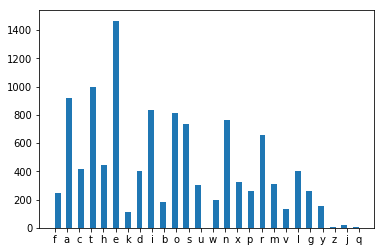

In [12]:
task_website()